In [1]:
h = 0.1
S = h*h
w = 2*S/h
N     = 20
Nnode = N*N

In [2]:
import numpy as np

In [3]:
connectivity = np.zeros ((Nnode,4)) 

for k in range (Nnode):
    [i,j] = [k/N, k%N]
    if i==0:
        connectivity [k,0] = -1
    else:
        connectivity [k,0] = (i-1)*N+j
    if j+1==N:
        connectivity [k,1] = -1
    else:
        connectivity [k,1] = (i)*N+(j+1)
    if i+1==N:
        connectivity [k,2] = -1
    else:
        connectivity [k,2] = (i+1)*N+j
    if j==0:
        connectivity [k,3] = -1
    else:
        connectivity [k,3] = (i)*N+(j-1)

In [4]:
A = np.zeros ((Nnode,Nnode))

for i in range (Nnode):
    A[i,i] = -4*w
    for j in range (4):
        if int(connectivity[i,j])!=-1:
            A[i,int(connectivity[i,j])] = w

b = np.ones ((Nnode,1))

In [5]:
import scipy.sparse as sp
import matplotlib.pyplot as plt
plt.spy(sp.csr_matrix(A))
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
#CG method 
eps = 1e-7
maxiter = 100
niter = 0
x = np.zeros((Nnode,1))
r = b
p0 = r
sigma = np.dot(p0.T,np.dot(A,p0))
rho0   = np.dot(r.T,r) 

while np.linalg.norm(r, ord = 2) > eps and niter < maxiter:
         alpha = rho0/sigma
         x     = x + alpha*p0
         r     = r - alpha*np.dot(A,p0)
         rho1  = np.dot(r.T,r)
         beta  = rho1/rho0
         p1    = r + beta*p0 
         sigma = np.dot(r.T,np.dot(A,p1))
         p0    = p1
         rho0  = rho1
         niter = niter + 1

<IPython.core.display.Javascript object>


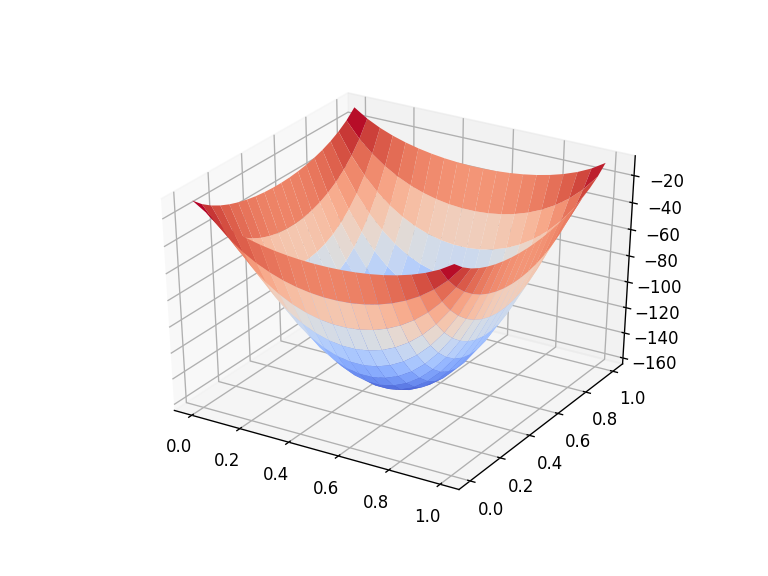

In [11]:
xx = np.linspace (0,1,N)
yy = np.linspace (0,1,N)
xx,yy = np.meshgrid(xx,yy)
phi = np.zeros   ((N,N))
for i in range (N):
    for j in range (N):
        phi[i,j] = x [i*N+j]
        
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
%matplotlib notebook
fig = plt.figure()
ax  = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(xx,yy,phi, cmap = cm.coolwarm)
plt.show()